<a href="https://colab.research.google.com/github/EbrahemHesham/EbrahemHesham/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor ,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score ,classification_report , mean_absolute_error ,r2_score ,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
import datetime as dt
from matplotlib.pyplot import rcParams
from sklearn.preprocessing import OneHotEncoder


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart_disease_uci.csv")

In [5]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
print("Min and max value of id: ",df.id.min()  ,df.id.max())
print("Min and max value of age: ",df.age.min(),df.age.max())

Min and max value of id:  1 920
Min and max value of age:  28 77


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
df.age.describe()

,age
count,920.000000
mean,53.510870
std,9.424685
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


<Axes: xlabel='num', ylabel='count'>

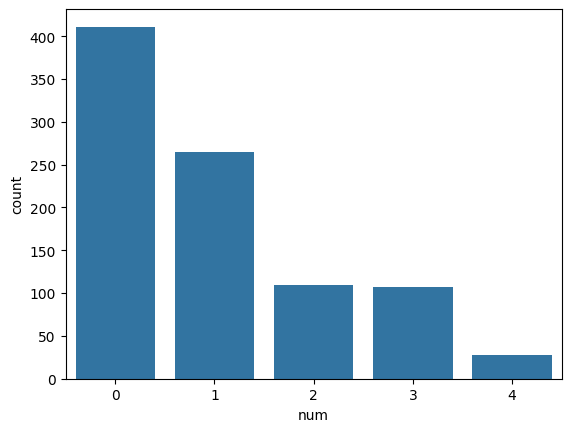

In [26]:
sns.countplot(data=df,x='num')

Mean: 53.51086956521739
Median: 54.0
Mode: 54


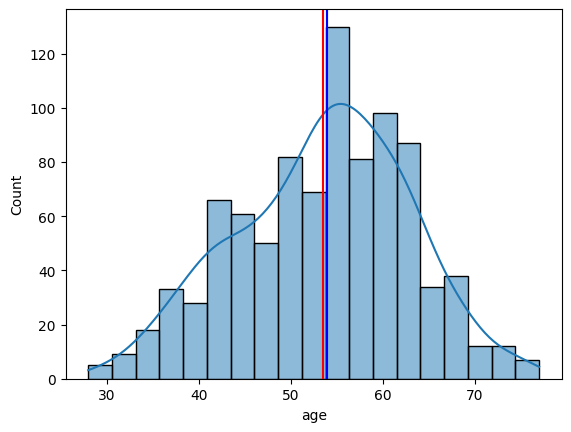

In [8]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

<Axes: xlabel='sex', ylabel='age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


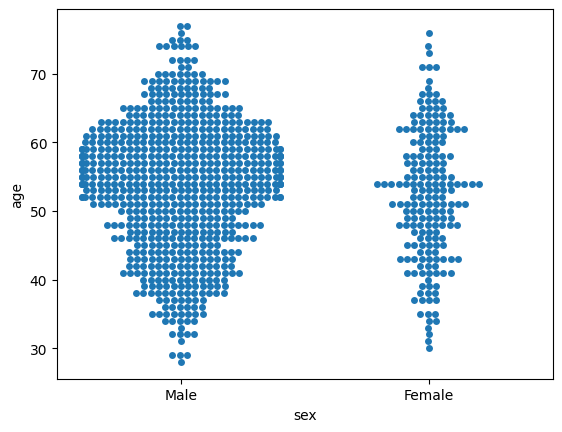

In [9]:
sns.swarmplot(x=df['sex'],y=df['age'])

<Axes: xlabel='age', ylabel='Count'>

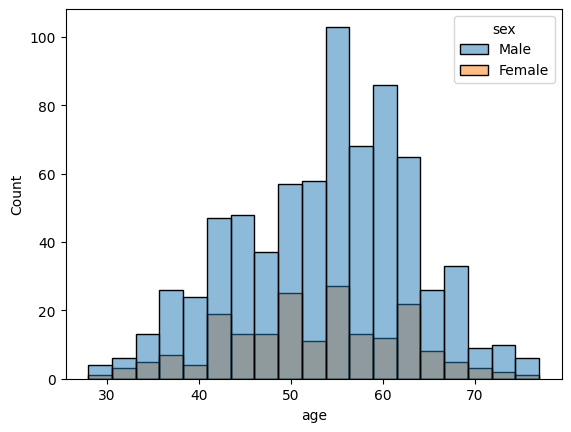

In [10]:
sns.histplot(df,x='age',hue='sex')

In [11]:
df['sex'].value_counts()


,count
sex,
Male,726
Female,194


In [12]:
# prompt: calculate the percentage of male and female in the dataset

# Calculate the percentage of male and female in the dataset
male_percentage = (df['sex'].value_counts()[1] / len(df)) * 100
female_percentage = (df['sex'].value_counts()[0] / len(df)) * 100

print(f"Percentage of Male: {male_percentage:.2f}%")
print(f"Percentage of Female: {female_percentage:.2f}%")


Percentage of Male: 21.09%
Percentage of Female: 78.91%


<ipython-input-12-31ddc8d97540>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_percentage = (df['sex'].value_counts()[1] / len(df)) * 100
<ipython-input-12-31ddc8d97540>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_percentage = (df['sex'].value_counts()[0] / len(df)) * 100


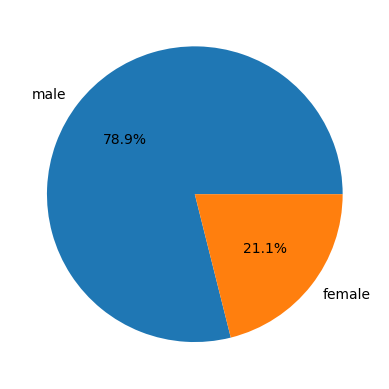

In [18]:
plt.pie(df['sex'].value_counts(),labels=['male','female'],autopct='%.1f%%')
plt.show()

In [19]:
df.groupby('sex')['age'].mean()

,age
sex,
Female,52.474227
Male,53.787879


In [20]:
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

In [21]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

<Axes: xlabel='num', ylabel='count'>

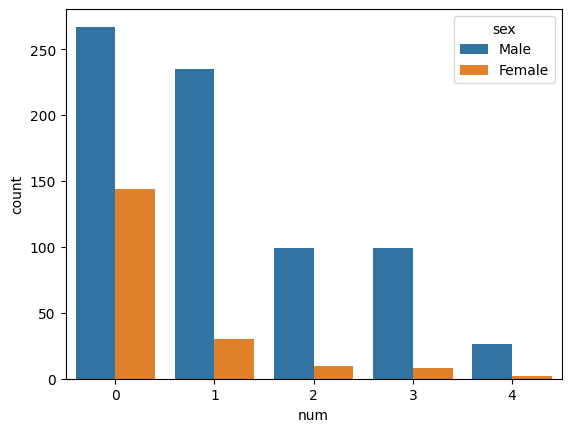

In [25]:
# Groupby num with sex
df.groupby('num')['sex'].value_counts()
# Plot to Visualize
sns.countplot(df, x='num', hue='sex')

<Axes: xlabel='age', ylabel='Count'>

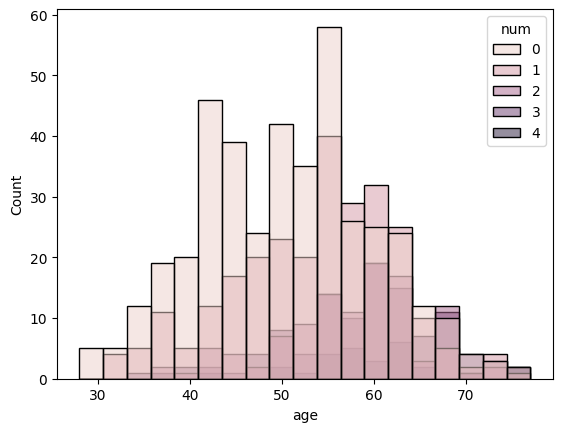

In [27]:
# groupby num by age
df.groupby('num')['age'].value_counts()
# Plot to Visualize
sns.histplot(df, x='age', hue='num')

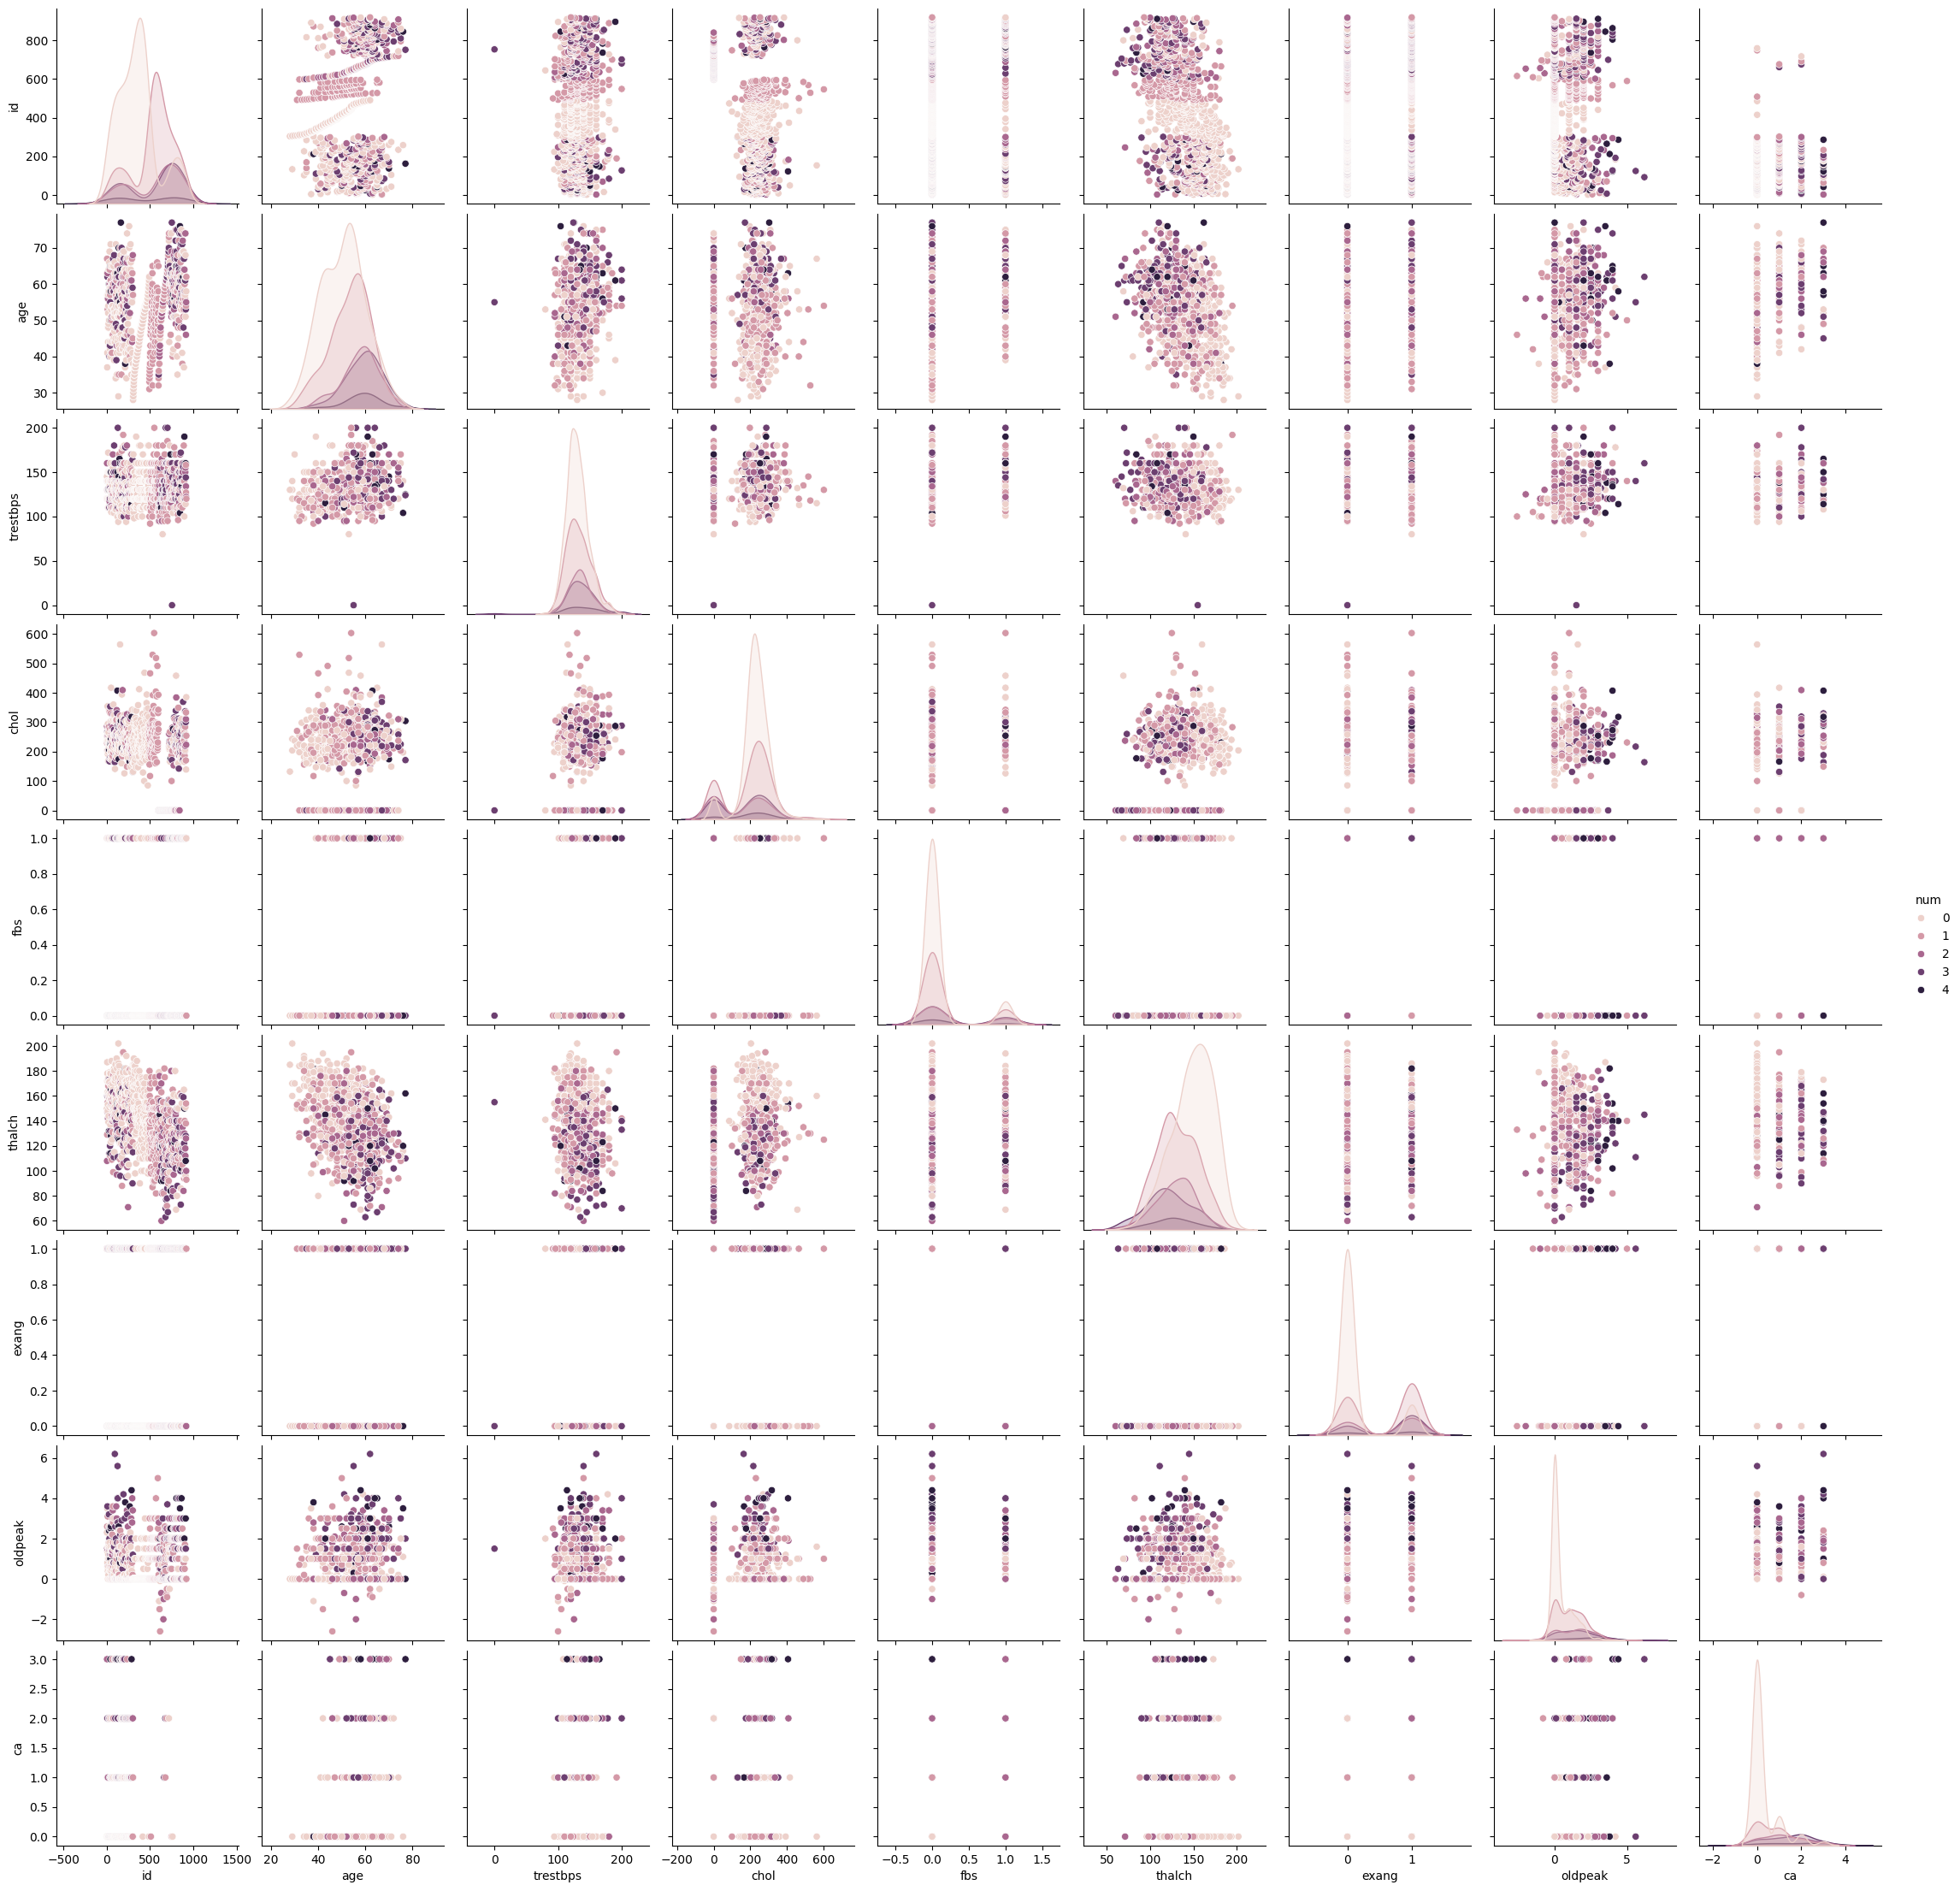

In [36]:
sns.pairplot(df,hue='num')

In [38]:
df.groupby('num')['sex'].value_counts()

num  sex   
0    Male      267
     Female    144
1    Male      235
     Female     30
2    Male       99
     Female     10
3    Male       99
     Female      8
4    Male       26
     Female      2
Name: count, dtype: int64

<Axes: ylabel='chol'>

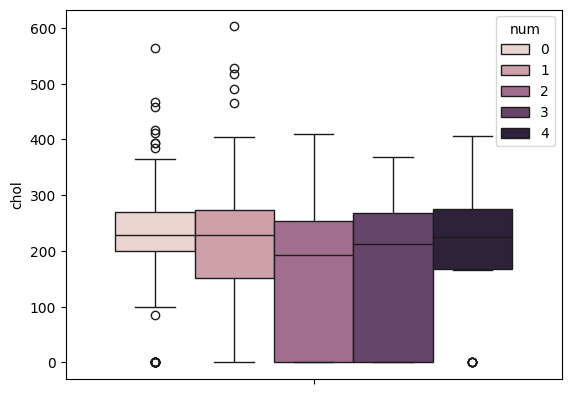

In [44]:
sns.boxplot(y=df['chol'], hue=df['num'])

In [45]:
pd.crosstab(df['num'],df['cp'])

cp,asymptomatic,atypical angina,non-anginal,typical angina
num,,,,
0,104,150,131,26
1,197,19,37,12
2,89,2,14,4
3,83,3,18,3
4,23,0,4,1


In [46]:
pd.crosstab(df['num'],df['sex'])

sex,Female,Male
num,,
0,144,267
1,30,235
2,10,99
3,8,99
4,2,26


In [48]:
pd.crosstab(df['num'],df['fbs'])

fbs,False,True
num,,
0,353,44
1,186,39
2,65,23
3,67,27
4,21,5


<Axes: xlabel='dataset', ylabel='count'>

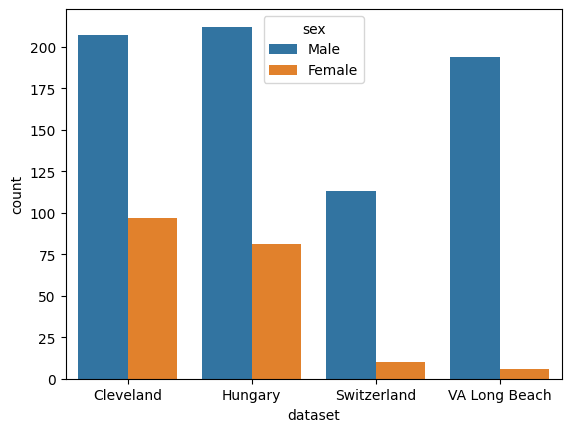

In [52]:
sns.countplot(df,x='dataset',hue='sex')

<Axes: xlabel='dataset', ylabel='count'>

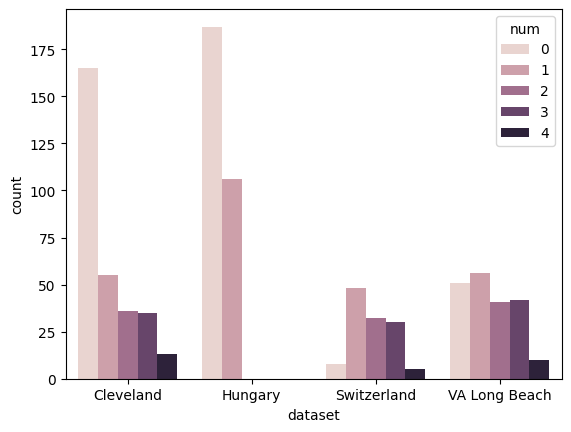

In [51]:
sns.countplot(df,x='dataset',hue='num')

In [53]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [54]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

,0
ca,611
thal,486
slope,309
fbs,90
oldpeak,62
trestbps,59
thalch,55
exang,55
chol,30
restecg,2


In [55]:
missing_data_cols=df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [60]:
categorical_cols = df.select_dtypes(include = ["object"]).keys()
print(categorical_cols)
bool_cols=['fbs', 'exang']
print(bool_cols)
numeric_cols=df.select_dtypes(include=['int64','float64']).keys()
print(numeric_cols)


['thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex', 'num']
Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')
['fbs', 'exang']


In [ ]:
def impute_categorical_missing_data(passed_col):
  df_null=df[df[passed_col ].isnull()]
  df_not_null=df[df[passed_col ].notnull()]

  X = df_not_null.drop(passed_col ,axis=1)
  y=df_not_null[passed_col ]

  other_missing_cols=[col for col in missing_data_cols if col != passed_col ]

  label_encoder=LabelEncoder()

  for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
              X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols
      y=label_encoder.fit_transform(y)




In [85]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [63]:
df1=df.copy()

In [86]:
# remove warning


# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df1[col].isnull().sum() / len(df1)) * 100, 2))+"%")
    if col in categorical_cols:
        df1[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df1[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.245433526011562 

RMSE = 17.238713590137014 

R2 = 0.07212920455204597 

Missing Values chol : 3.26%
MAE = 44.37893258426966 

RMSE = 62.907541638056564 

R2 = 0.6865097248925291 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 68.48 accuracy

Missing Values thalch : 5.98%
MAE = 16.439710982658962 

RMSE = 21.364514214698584 

R2 = 0.33629458927354905 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.77 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5635755813953488 

RMSE = 0.7913483966520187 

R2 = 0.4033860561426764 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 68.29 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 69.35 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 70.11 accuracy



In [87]:
df1.isnull().sum()


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


IndexError: list index out of range

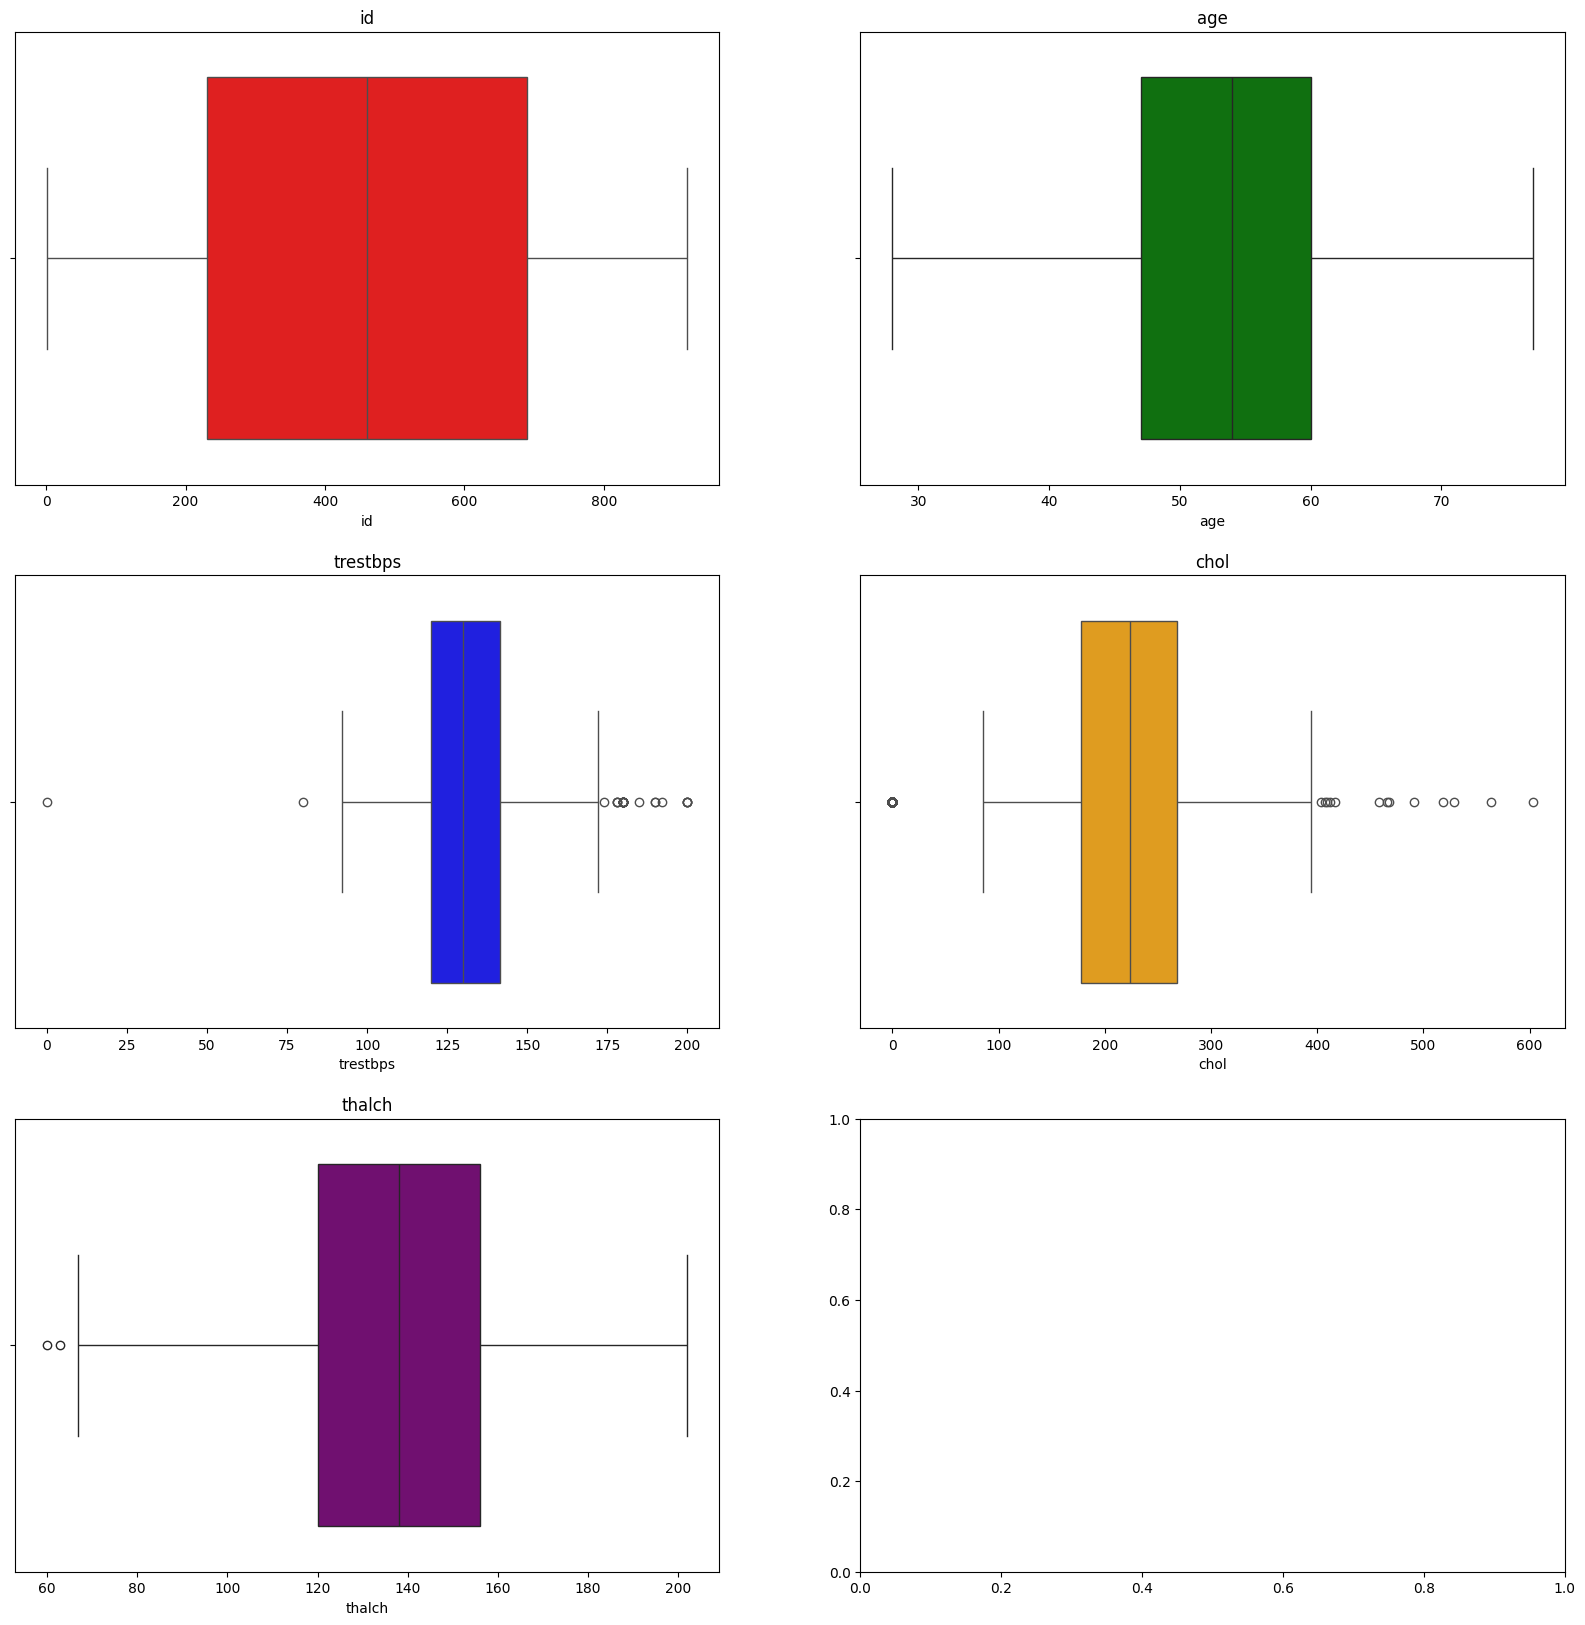

In [89]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df1[col], color=colors[i])
    plt.title(col)
plt.show()

In [90]:
# print the row from df where trestbps value is 0
df1[df1['trestbps'] == 0]
# remove this row from data
df1 = df1[df1['trestbps'] != 0]

In [91]:
df2=df1.copy()

In [92]:
df2.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [93]:
# In some of the features, there is space will will create problem later on.
# So we rename those attributes to handle problems in the future.
df2['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
df2['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)
df2['restecg'].replace({'normal': 'normal' , 'st-t abnormality': 'ST-T_wave_abnormality' , 'lv hypertrophy': 'left_ventricular_hypertrophy' }, inplace =True)

In [95]:
# Genrating New Dataset with Less Columns Which Are Necessary .
df3 = df2[['age','sex','cp','dataset', 'trestbps', 'chol', 'fbs','restecg' , 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
# Some Changes in Target Variable | Only Two Categories (0,1) . 0 for No-Disease , 1 for Disease
df3['target'] = ((df2['num'] > 0)*1).copy()
# Encoding Sex
df3['sex'] = (df2['sex'] == 'Male')*1
# Encoding Fbs and exang
df3['fbs'] = (df2['fbs'])*1
df3['exang'] = (df2['exang'])*1
# Renaming COlumns Names.
df3.columns = ['age', 'sex', 'chest_pain_type','country' ,'resting_blood_pressure',
              'cholesterol', 'fasting_blood_sugar','Restecg',
              'max_heart_rate_achieved', 'exercise_induced_angina',
              'st_depression', 'st_slope_type', 'num_major_vessels',
              'thalassemia_type', 'target']
# Load Data Sample
df3.head()

,age,sex,chest_pain_type,country,resting_blood_pressure,cholesterol,fasting_blood_sugar,Restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,typical_angina,Cleveland,145.0,233.0,1,left_ventricular_hypertrophy,150.0,0,2.3,downsloping,0.0,fixed_defect,0
1,67,1,asymptomatic,Cleveland,160.0,286.0,0,left_ventricular_hypertrophy,108.0,1,1.5,flat,3.0,normal,1
2,67,1,asymptomatic,Cleveland,120.0,229.0,0,left_ventricular_hypertrophy,129.0,1,2.6,flat,2.0,reversable_defect,1
3,37,1,non-anginal,Cleveland,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,41,0,atypical_angina,Cleveland,130.0,204.0,0,left_ventricular_hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


# Training and testing

In [98]:
X=df3.drop(['target'],axis=1)
y=df3['target']

In [99]:
label_encoders={}
for col in X.select_dtypes(include=['object', 'category']).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [104]:
# Scaling Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM Linear kernel": SVC(kernel='linear'),
    "SVM RBF kernel": SVC(kernel='rbf'),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    print(f"Training {name}...")
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm=confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred, average='weighted')
    precision=precision_score(y_test, y_pred, average='weighted')
    f1=f1_score(y_test, y_pred, average='weighted')

    print(f"{name} Confusion Matrix:\n {cm}")
    print(f"{name} Accuracy: {np.round(accuracy,2)}")
    print(f"{name} Recall: {np.round(recall,2)}")
    print(f"{name} Precision: {np.round(precision,2)}")
    print(f"{name} F1-Score: {np.round(f1,2)}")
    # print(classification_report(y_test, y_pred))


Training Decision Tree...
Decision Tree Confusion Matrix:
 [[ 95  25]
 [ 27 129]]
Decision Tree Accuracy: 0.81
Decision Tree Recall: 0.81
Decision Tree Precision: 0.81
Decision Tree F1-Score: 0.81
Training Random Forest...
Random Forest Confusion Matrix:
 [[ 98  22]
 [ 20 136]]
Random Forest Accuracy: 0.85
Random Forest Recall: 0.85
Random Forest Precision: 0.85
Random Forest F1-Score: 0.85
Training SVM Linear kernel...
SVM Linear kernel Confusion Matrix:
 [[ 93  27]
 [ 27 129]]
SVM Linear kernel Accuracy: 0.8
SVM Linear kernel Recall: 0.8
SVM Linear kernel Precision: 0.8
SVM Linear kernel F1-Score: 0.8
Training SVM RBF kernel...
SVM RBF kernel Confusion Matrix:
 [[ 97  23]
 [ 22 134]]
SVM RBF kernel Accuracy: 0.84
SVM RBF kernel Recall: 0.84
SVM RBF kernel Precision: 0.84
SVM RBF kernel F1-Score: 0.84
Training KNN...
KNN Confusion Matrix:
 [[ 99  21]
 [ 27 129]]
KNN Accuracy: 0.83
KNN Recall: 0.83
KNN Precision: 0.83
KNN F1-Score: 0.83
Training Naive Bayes...
Naive Bayes Confusion Mat

In [113]:
for name, model in models.items():
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {np.round(accuracy,2)}")

Decision Tree accuracy: 0.79
Random Forest accuracy: 0.84
SVM Linear kernel accuracy: 0.8
SVM RBF kernel accuracy: 0.84
KNN accuracy: 0.83
Naive Bayes accuracy: 0.83


In [106]:
def evaluate_model(y_test, y_pred):
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))